## Final Project Submission

Please fill out:
* Student name: ANDREW WESTER
* Student pace: FULL TIME
* Scheduled project review date/time: FRIDAY, NOVEMBER 9, 2018
* Instructor name: RAFAEL CARRASCO


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import and preview housing data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Look at housing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
# Identify sqft_basement as object (probably should be float or int)
# Notice waterfront, view, and yr_renovated don't have full dataset indicating null values

In [4]:
# Check for null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# Look at descriptive information of housing data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Appears bedrooms, bathrooms, floors, waterfront (boolean), view, condition, grade, can all be considered categorical data
# Zipcode, lat and long are all important for graphing on a map, but won't be likely needed to represent housing in this study

In [7]:
# Change sqft_basement '?' values to '0.0' in order to...
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')
# ... Change sqft_basement type from object to np.float64, check success via .info()
df['sqft_basement'] = df['sqft_basement'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [8]:
# Create column sqft_total to examine the combined square feet between basement and living room
df['sqft_total'] = df.sqft_basement + df.sqft_living

In [9]:
# Change yr_renovated null values to 0, check success via .unique()
df.yr_renovated.fillna(0., inplace=True)
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

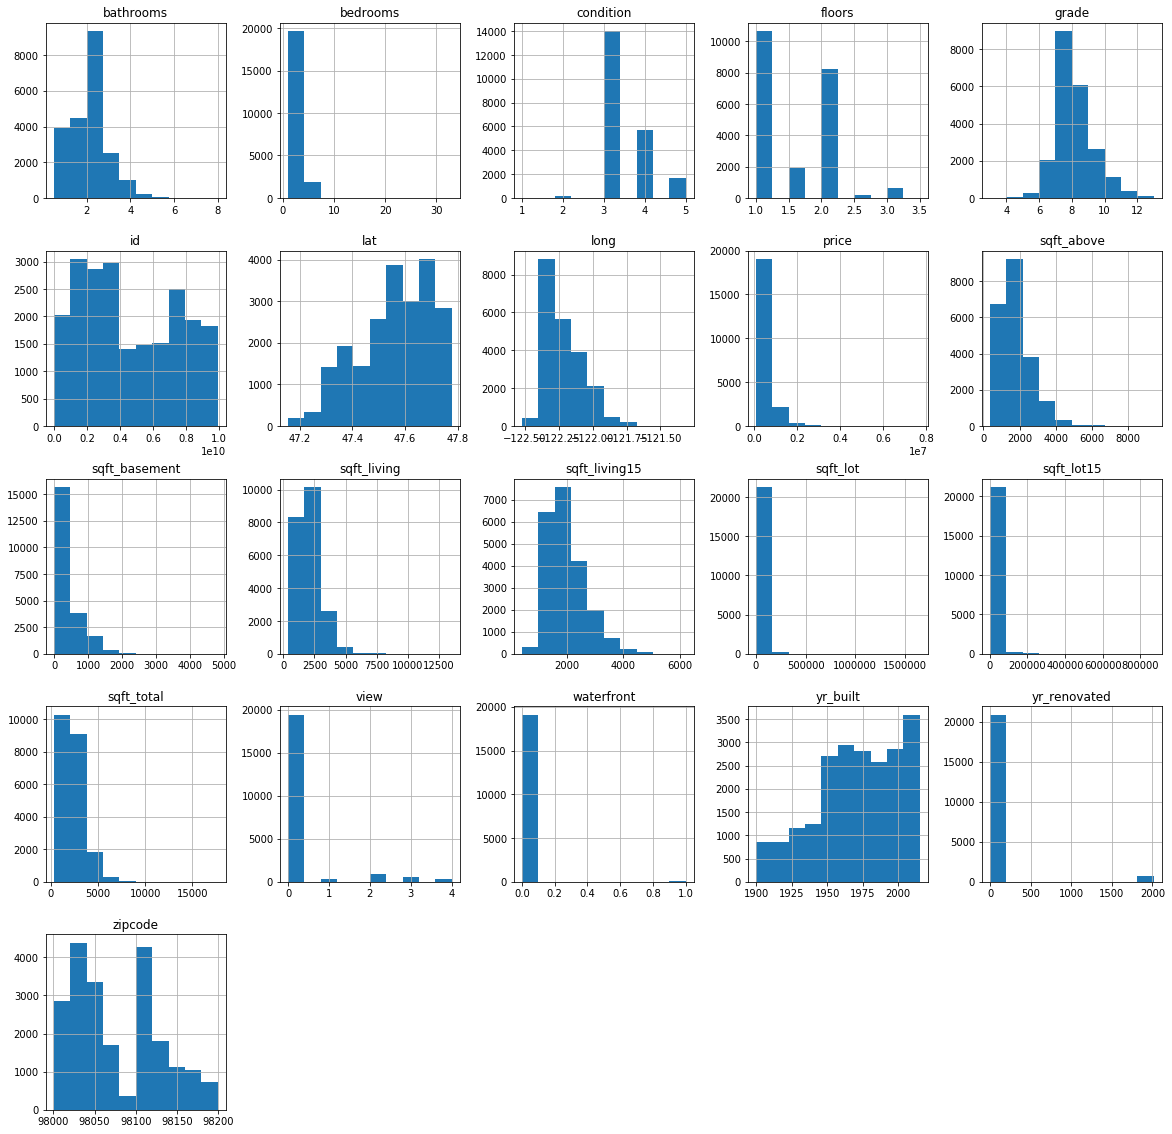

In [10]:
# Plot histogram of each column to see layout of each piece of data
df.hist(figsize =(20,20));

In [11]:
# After removing null values and changing sqft_basement to float, we graph each column to see relationships
# We confirm condition, floors, view, and waterfront(boolean) are all categorical data
# Grade doesn't appear categorical by its graph, but from seeing the values in the column it appears categorical
# Heavy skew for bedrooms, bathrooms, lat, long, price, all sqft categories, and yr_built

In [12]:
#Explore DATA

In [13]:
# Set Price column as its own variable
# Can use this later for analysis
price = df.price
price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5,1,'Houses by Total Square Footage')

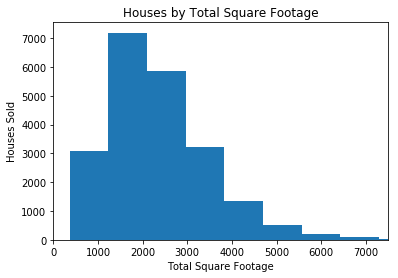

In [14]:
# Start examining total square feet per house, limit x values to 7500 for visual clarity 
plt.hist(x=df.sqft_total, bins=20, align='mid')
plt.xlim(0,7500)
plt.xlabel('Total Square Footage')
plt.ylabel('Houses Sold')
plt.title('Houses by Total Square Footage')

In [15]:
# Examine data for total square feet columm
df.sqft_total.describe()

count    21597.000000
mean      2366.038431
std       1175.817847
min        370.000000
25%       1500.000000
50%       2160.000000
75%       2980.000000
max      17670.000000
Name: sqft_total, dtype: float64

In [16]:
# split data into new dataframe over_2400/below_2400 for houses with more than or 2,400 or less square feet
# Check length of new dataframe to confirm not too large of a sample size in either category
over_2400 = df.loc[df['sqft_total'] > 2400]
below_2400 = df.loc[df['sqft_total']<= 2400]
print(len(over_2400))
print(len(below_2400))

8981
12616


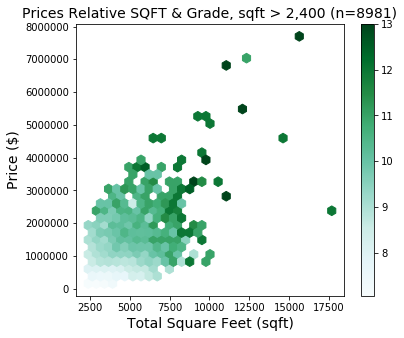

In [17]:
# Graph data with hexbin plot to examine the effect of total square feet on housing price
# By adding the color bar on the right to reference grade, we can see the distribution of grades on the house price as well
over_2400.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, sharex=False, figsize=(6,5))
plt.xlabel('Total Square Feet (sqft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Prices Relative SQFT & Grade, sqft > 2,400 (n=8981)', fontsize=14);

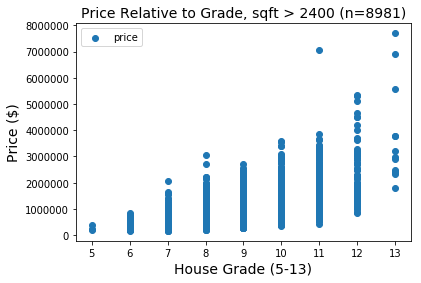

In [18]:
# Graph the distribution of housing grades relative to price to see relationship
x = over_2400.grade
y = over_2400.price
plt.scatter(x, y)
plt.xlabel('House Grade (5-13)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Grade, sqft > 2400 (n=8981)', fontsize=14)
plt.legend(loc=2);

In [19]:
# Examine distribution of grades amongst the over_2400 data set
print(over_2400.grade.value_counts())
print(len(over_2400))

8     2802
7     2333
9     2114
10    1095
11     397
6      135
12      89
13      13
5        3
Name: grade, dtype: int64
8981


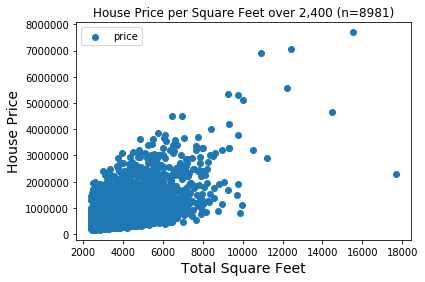

In [21]:
# Graph scatter plot examining relationship between total square feet and price
x = over_2400.sqft_total
y = over_2400.price
plt.scatter(x, y)
plt.title('House Price per Square Feet over 2,400 (n=8981)')
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.legend(loc=2)
plt.show();

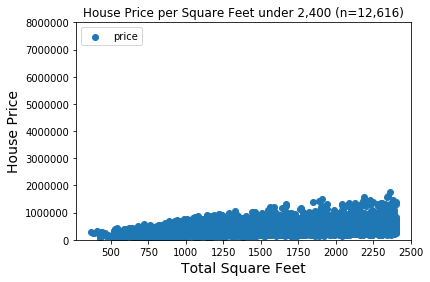

In [24]:
# Graph scatter plot examining relationship between total square feet and price
# Change scale of y axis to represent same scale as the prior graph to show pricing difference between > and < 2400 sqft
x = below_2400.sqft_total
y = below_2400.price
plt.scatter(x, y)
plt.ylim(0,8000000)
plt.title('House Price per Square Feet under 2,400 (n=12,616)')
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.legend(loc=2)
plt.show();

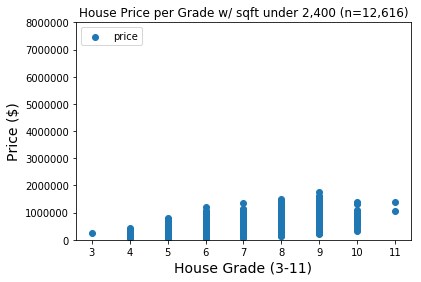

In [27]:
# Graph distribution of housing grades relative to price of house sold
# Change y axis scale to match the graph of houses with > 2400 sqft to see the true difference in price
x = below_2400.grade
y = below_2400.price
plt.scatter(x, y)
plt.title('House Price per Grade w/ sqft under 2,400 (n=12,616)')
plt.xlabel('House Grade (3-11)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

In [28]:
# Create new df for analysis and drop all columns from new df except for price, grade, sqft_total
over_2400a = over_2400.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                     'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)

In [29]:
# Create new df for analysis and drop all columns for new df except for price, grade, sqft_total
below_2400a = below_2400.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                       'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)

               price     grade  sqft_total
price       1.000000  0.628803    0.610688
grade       0.628803  1.000000    0.477721
sqft_total  0.610688  0.477721    1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


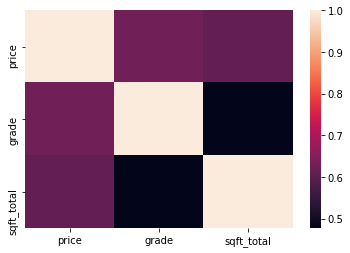

In [32]:
# Examine correlation via heatmap of price, grade, and total square feet for houses with more than 2400 sqft
print(over_2400a.corr());
print(sns.heatmap(over_2400a.corr()));

In [34]:
# In houses with sqft > 2400, there does not appear to be strong correlation between grade and sqft_total,
# While there is moderate correlation between both sqft_total & grade with the price

               price     grade  sqft_total
price       1.000000  0.479010    0.372221
grade       0.479010  1.000000    0.519518
sqft_total  0.372221  0.519518    1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


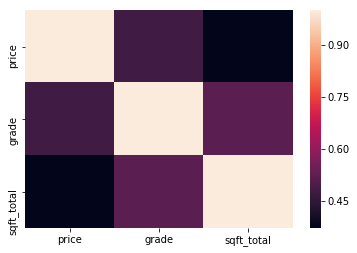

In [35]:
# Examine correlation via heatmap of price, grade, adn total square feet for houses with 2400 or less sqft
print(below_2400a.corr());
print(sns.heatmap(below_2400a.corr()));

In [36]:
# In houses with 2400 or less sqft, there does not appear to be a strong correlation between sqft_total and price,
# While there is moderate correlation between the grade and price

In [91]:
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')

-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------


In [82]:
# MOVE FROM EXAMINING SQUARE FOOTAGE OVER OR UNDER 2,400 SQFT TO:
# NOW EXAMINING GRADE OF HOUSE OVER OR UNDER 8

Text(0.5,1,'Houses Sold by Grade')

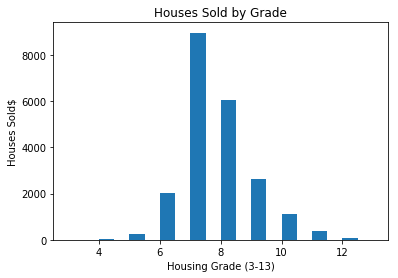

In [55]:
# Move on to examining grade per house, 
plt.hist(x=df.grade, bins=20, align='mid')
plt.xlabel('Housing Grade (3-13)')
plt.ylabel('Houses Sold$')
plt.title('Houses Sold by Grade')

In [56]:
df.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [58]:
# Split df by grade, less than 8 and greater than or equal to 8
eight_plus = df.loc[df["grade"]>7.5]
eight_minus = df.loc[df["grade"]<7.5]
print(len(above_8))
print(len(below_8))

10315
11282


In [62]:
eight_plus.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
count,1.031500e+04,1.031500e+04,10315.000000,10315.000000,10315.000000,1.031500e+04,10315.00000,9199.000000,10285.000000,10315.000000,...,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000
mean,4.671037e+09,7.149265e+05,3.637130,2.563694,2625.471352,1.827020e+04,1.75269,0.012067,0.380749,3.311779,...,2284.432477,333.825691,1983.990596,75.617838,98069.114881,47.572841,-122.188451,2387.621328,14886.086767,2959.297043
std,2.911293e+09,4.445661e+05,0.843526,0.648786,940.580394,4.751856e+04,0.53391,0.109189,0.962592,0.576621,...,865.792236,503.739800,25.997151,381.491656,49.579127,0.129775,0.141764,708.828072,31259.400188,1233.735540
min,1.200019e+06,1.400000e+05,1.000000,0.500000,750.000000,6.000000e+02,1.00000,0.000000,0.000000,1.000000,...,630.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,460.000000,651.000000,750.000000
25%,2.141331e+09,4.500000e+05,3.000000,2.250000,1990.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,...,1625.000000,0.000000,1972.000000,0.000000,98029.000000,47.509000,-122.309000,1880.000000,5165.500000,2110.000000
50%,4.014400e+09,6.095000e+05,4.000000,2.500000,2490.000000,8.075000e+03,2.00000,0.000000,0.000000,3.000000,...,2160.000000,0.000000,1990.000000,0.000000,98058.000000,47.592400,-122.190000,2310.000000,8006.000000,2730.000000
75%,7.518503e+09,8.250000e+05,4.000000,2.750000,3100.000000,1.290250e+04,2.00000,0.000000,0.000000,4.000000,...,2780.000000,650.000000,2004.000000,0.000000,98108.000000,47.670900,-122.086000,2810.000000,11837.000000,3530.000000
max,9.895000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.074218e+06,3.50000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.402000,6210.000000,871200.000000,17670.000000


In [63]:
eight_minus.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
count,1.128200e+04,1.128200e+04,11282.000000,11282.000000,11282.000000,1.128200e+04,11282.000000,10022.000000,11249.000000,11282.000000,...,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000
mean,4.497674e+09,3.806345e+05,3.131892,1.706346,1581.898068,1.220039e+04,1.257667,0.003492,0.099564,3.499468,...,1335.260149,241.730987,1959.122230,62.486527,98086.031377,47.548438,-122.237325,1619.989807,10812.858004,1823.629055
std,2.842378e+09,1.558398e+05,0.932799,0.629363,533.492105,3.465688e+04,0.424147,0.058995,0.487257,0.699544,...,442.747536,366.421968,27.177206,347.211078,55.659753,0.145145,0.135628,397.547183,22864.291026,799.390676
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,659.000000,370.000000
25%,2.113700e+09,2.650000e+05,3.000000,1.000000,1200.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,...,1030.000000,0.000000,1943.000000,0.000000,98034.000000,47.445900,-122.338000,1340.000000,5080.000000,1220.000000
50%,3.867400e+09,3.500000e+05,3.000000,1.750000,1520.000000,7.350000e+03,1.000000,0.000000,0.000000,3.000000,...,1250.000000,0.000000,1959.000000,0.000000,98103.000000,47.549550,-122.282000,1570.000000,7450.000000,1640.000000
75%,7.214820e+09,4.620000e+05,4.000000,2.250000,1900.000000,9.600000e+03,1.500000,0.000000,0.000000,4.000000,...,1550.000000,490.000000,1978.000000,0.000000,98125.000000,47.682600,-122.171000,1840.000000,9256.750000,2290.000000
max,9.900000e+09,2.050000e+06,33.000000,7.500000,4480.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,...,4190.000000,2070.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4090.000000,425581.000000,6210.000000


In [64]:
avg_price_above = np.mean(eight_plus['price'])
avg_price_above

714926.4740668929

In [65]:
avg_price_below = np.mean(eight_minus['price'])
avg_price_below

380634.50788867223

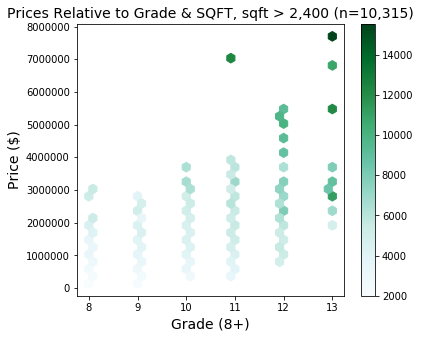

In [66]:
# Graph data with hexbin plot to examine the effect of grade on housing price
# By adding the color bar on the right to reference sqft_total, we can see the distribution of sqft_total on the house price as well
eight_plus.plot.hexbin(x='grade', y='price', C='sqft_total', gridsize=30, sharex=False, figsize=(6,5))
plt.xlabel('Grade (8+)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Prices Relative to Grade & SQFT, sqft > 2,400 (n=10,315)', fontsize=14);

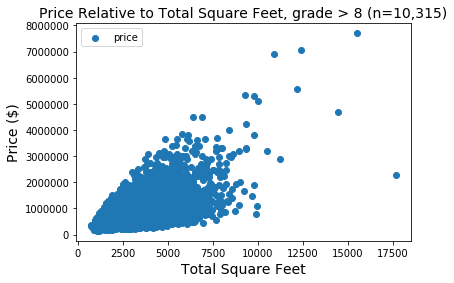

In [68]:
# Graph the distribution of square feet relative to price to see relationship
x = eight_plus.sqft_total
y = eight_plus.price
plt.scatter(x, y)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Total Square Feet, grade > 8 (n=10,315)', fontsize=14)
plt.legend(loc=2);

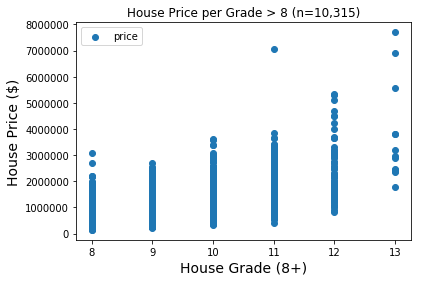

In [74]:
# Graph the distribution of grade>8 relative to price to see relationship
x = eight_plus.grade
y = eight_plus.price
plt.scatter(x, y)
plt.title('House Price per Grade > 8 (n=10,315)')
plt.xlabel('House Grade (8+)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.legend(loc=2)
plt.show();

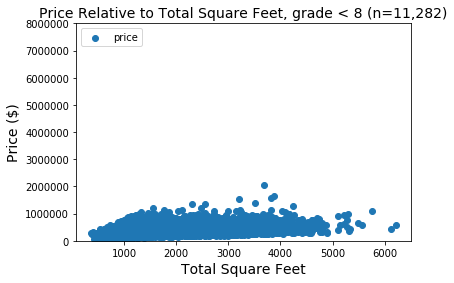

In [80]:
# Graph the distribution of square feet relative to price to see relationship
# Set y scale equal to that of grade >8 to show relative difference in price of houses
x = eight_minus.sqft_total
y = eight_minus.price
plt.scatter(x, y)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Total Square Feet, grade < 8 (n=11,282)', fontsize=14)
plt.ylim(0, 8000000)
plt.legend(loc=2);

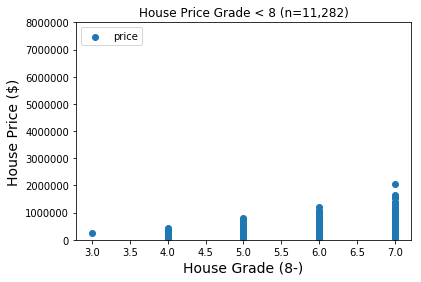

In [81]:
# Graph the distribution of grade<8 relative to price to see relationship
# Set y scale equal to that of grade >8 to show relative difference in price of houses
x = eight_minus.grade
y = eight_minus.price
plt.scatter(x, y)
plt.title('House Price Grade < 8 (n=11,282)')
plt.xlabel('House Grade (8-)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

In [119]:
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')
print('-------------------------------------------BREAK-------------------------------------------------------')

-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------
-------------------------------------------BREAK-------------------------------------------------------


In [120]:
# Time to Model Results with full dataset

In [125]:
grade = df['grade']
logsqft = np.log(df['sqft_total'])
price = df['price']
scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
scaled_sqft = (logsqft-np.mean(logsqft))/(max(logsqft)-min(logsqft))
data_final = pd.DataFrame([])
data_final = pd.concat([price, scaled_grade, scaled_sqft], axis=1)
y = data_final[["price"]]
X = data_final.drop(["price"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt


#TRAIN TEST SPLIT

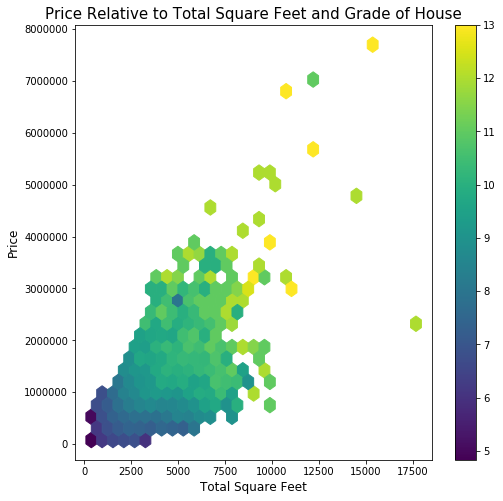

In [96]:
df.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, cmap="viridis", sharex=False, figsize=(8,8))
plt.title('Price Relative to Total Square Feet and Grade of House', fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Total Square Feet', fontsize=12)
plt.show()